In [1]:
import sys
import os
import glob
import random

import matplotlib.pyplot as plt
import numpy as np
import cv2
from helpers import get_image_lists, load_image, get_smear_set
import noise

ModuleNotFoundError: No module named 'kvalid_training'

In [ ]:
def get_mask_set():
    normal_file_cells, abnormal_cells = get_image_lists()
    images = []
    for filename in normal_file_cells:
        images.append(load_image(filename[:-4] + '-d.bmp'))
    for filename in abnormal_cells:
        images.append(load_image(filename[:-4] + '-d.bmp'))
    images = np.array(images)
    return images


In [97]:
normal_cells, abnormal_cells = get_image_lists()
images, labels = get_smear_set(False)

Healhy cell images:  242
Unhealhy cell images:  675


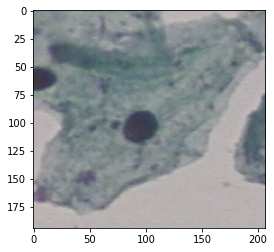

In [8]:
plt.imshow(images[0])

In [37]:
shape = images[0].shape
height, width, channels = images[0].shape
print(height, width, channels)

194 207 3


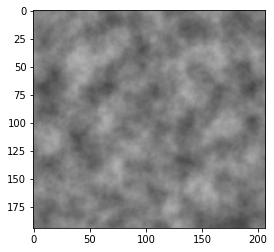

In [38]:

scale = (height+width)/14
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = np.random.randint(0,100)

world = np.zeros(shape)

x_idx = np.linspace(0, 1, shape[0])
y_idx = np.linspace(0, 1, shape[1])
world_x, world_y = np.meshgrid(x_idx, y_idx)


for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=shape[0], 
                                    repeaty=shape[1], 
                                    #base=0
                                    )
img = np.floor((world + 1) * 255 /2).astype(np.uint8)
plt.imshow(img)


In [36]:
img.max()
img.min()
img.shape

(207, 194)

In [20]:
masks = get_mask_set()


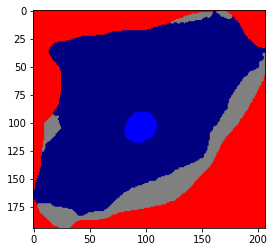

In [21]:
plt.imshow(masks[0])

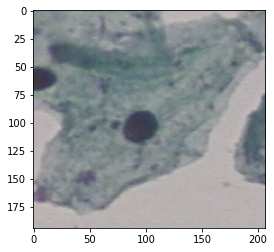

In [23]:
plt.imshow(images[0])

In [35]:
segmented_img = np.zeros(images[0].shape,  dtype = np.uint8)
for j, y in enumerate(masks[0]):
    for i, color in enumerate(y):
        if color[0] == 0 and color[1] == 0 and color[2] == 255:
            segmented_img[j][i] = images[0][j][i]

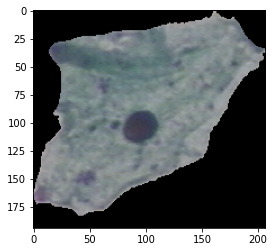

In [36]:
plt.imshow(segmented_img)

In [57]:
world = world.astype(np.uint8)
weight = 0.07
img_and_perlin = cv2.addWeighted(images[0], 1. - weight, world, weight, 0)
rgb_img_perlin = cv2.cvtColor(img_and_perlin, cv2.COLOR_BGR2RGB)

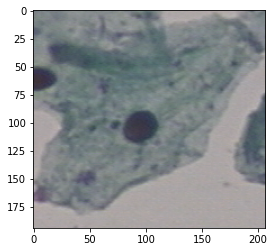

In [58]:
plt.imshow(img_and_perlin)

In [67]:
segmented_img_perlin = np.zeros(images[0].shape,  dtype = np.uint8)
for j, y in enumerate(masks[0]):
    for i, color in enumerate(y):
        if color[0] == 0 and color[1] == 0 and color[2] == 255:
            segmented_img_perlin[j][i] = img_and_perlin[j][i]
        else:
            segmented_img_perlin[j][i] = images[0][j][i]

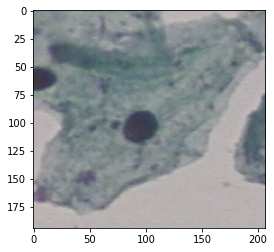

In [70]:
plt.imshow(images[0])

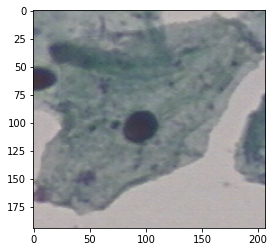

In [71]:
plt.imshow(segmented_img_perlin)

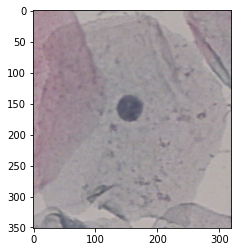

In [80]:
plt.imshow(images[5])

In [102]:
for i, image in enumerate(images):
    images[i] = cv2.resize(image, (128, 128))

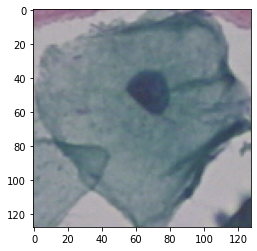

In [103]:
plt.imshow(images[22])


In [104]:
type(images)

numpy.ndarray

In [105]:
type(labels)

numpy.ndarray

In [106]:
dataset = list(zip(images, labels))

In [107]:
random.shuffle(dataset)

In [108]:
images, labels = zip(*dataset)

In [112]:
type(images[0])

numpy.ndarray